use py 3.10.7

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_cf = pd.read_csv("..\\data\\cash_flows.csv", thousands=',')


In [5]:
df_cf = df_cf.replace("--", np.nan)
df_cf = df_cf.dropna(how="any")
df_cf = df_cf.transpose()
df_cf = df_cf.rename(columns= lambda x: x)

df_cf.head()

,0,1,2,3,4,5,6,7
index,year,Net Profit/Loss Before Extraordinary Items And...,Net CashFlow From Operating Activities,Net Cash Used In Investing Activities,Net Cash Used From Financing Activities,Net Inc/Dec In Cash And Cash Equivalents,Cash And Cash Equivalents Begin of Year,Cash And Cash Equivalents End Of Year
1,22-Mar,621.73,"3,012.05","-8,803.19","7,308.44","1,517.30","3,310.74","4,828.04"
2,21-Mar,"2,909.64","3,041.80","-7,966.60","3,827.15","-1,097.65","4,408.39","3,310.74"
3,20-Mar,"2,031.73","3,169.95",-31.35,"-2,580.74",557.86,"3,850.53","4,408.39"
4,19-Mar,"3,663.64","3,214.41","-2,403.12","2,555.24","3,366.53",484,"3,850.53"


In [6]:
df_cf.shape

(20, 8)

In [7]:
df_cf.columns = df_cf.iloc[0]
df_cf = df_cf[1:]
# Add a leading zero to single-digit years
df_cf['year'] = df_cf['year'].apply(lambda x: '0' + x if len(x) == 5 else x)

# Convert the 'year' column to datetime format
df_cf['year'] = pd.to_datetime(df_cf['year'], format='%y-%b')
df_cf['year'] = df_cf['year'].dt.strftime('%Y-%m-01')

# removing all commas in values
numeric_columns = df_cf.columns[1:]  # Exclude the first column
df_cf[numeric_columns] = df_cf[numeric_columns].replace(',', '', regex=True).astype(float)
df_cf[df_cf.columns[1:]] = df_cf[df_cf.columns[1:]].astype(float)
df_cf.head()

index,year,Net Profit/Loss Before Extraordinary Items And Tax,Net CashFlow From Operating Activities,Net Cash Used In Investing Activities,Net Cash Used From Financing Activities,Net Inc/Dec In Cash And Cash Equivalents,Cash And Cash Equivalents Begin of Year,Cash And Cash Equivalents End Of Year
1,2022-03-01,621.73,3012.05,-8803.19,7308.44,1517.30,3310.74,4828.04
2,2021-03-01,2909.64,3041.80,-7966.60,3827.15,-1097.65,4408.39,3310.74
3,2020-03-01,2031.73,3169.95,-31.35,-2580.74,557.86,3850.53,4408.39
4,2019-03-01,3663.64,3214.41,-2403.12,2555.24,3366.53,484.00,3850.53
5,2018-03-01,3829.18,2411.25,-550.04,-1925.66,-64.45,548.45,484.00


In [7]:
#df_cf.to_csv('..\\data\\cash_flows_processed.csv', index=False)

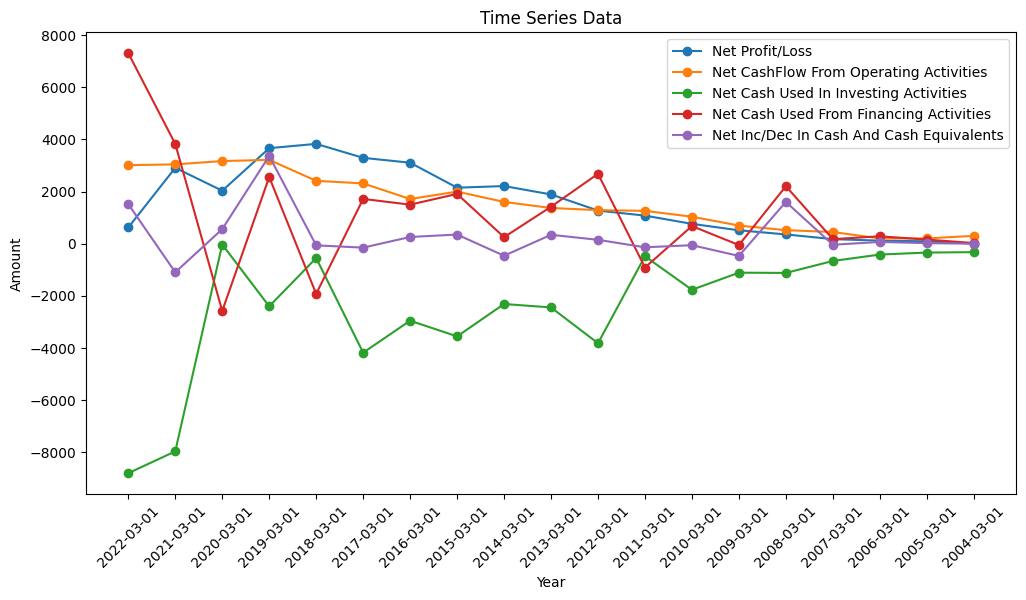

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df_cf['year'], df_cf['Net Profit/Loss Before Extraordinary Items And Tax'], marker='o', label='Net Profit/Loss')
plt.plot(df_cf['year'], df_cf['Net CashFlow From Operating Activities'], marker='o', label='Net CashFlow From Operating Activities')
plt.plot(df_cf['year'], df_cf['Net Cash Used In Investing Activities'], marker='o', label='Net Cash Used In Investing Activities')
plt.plot(df_cf['year'], df_cf['Net Cash Used From Financing Activities'], marker='o', label='Net Cash Used From Financing Activities')
plt.plot(df_cf['year'], df_cf['Net Inc/Dec In Cash And Cash Equivalents'], marker='o', label='Net Inc/Dec In Cash And Cash Equivalents')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Time Series Data')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

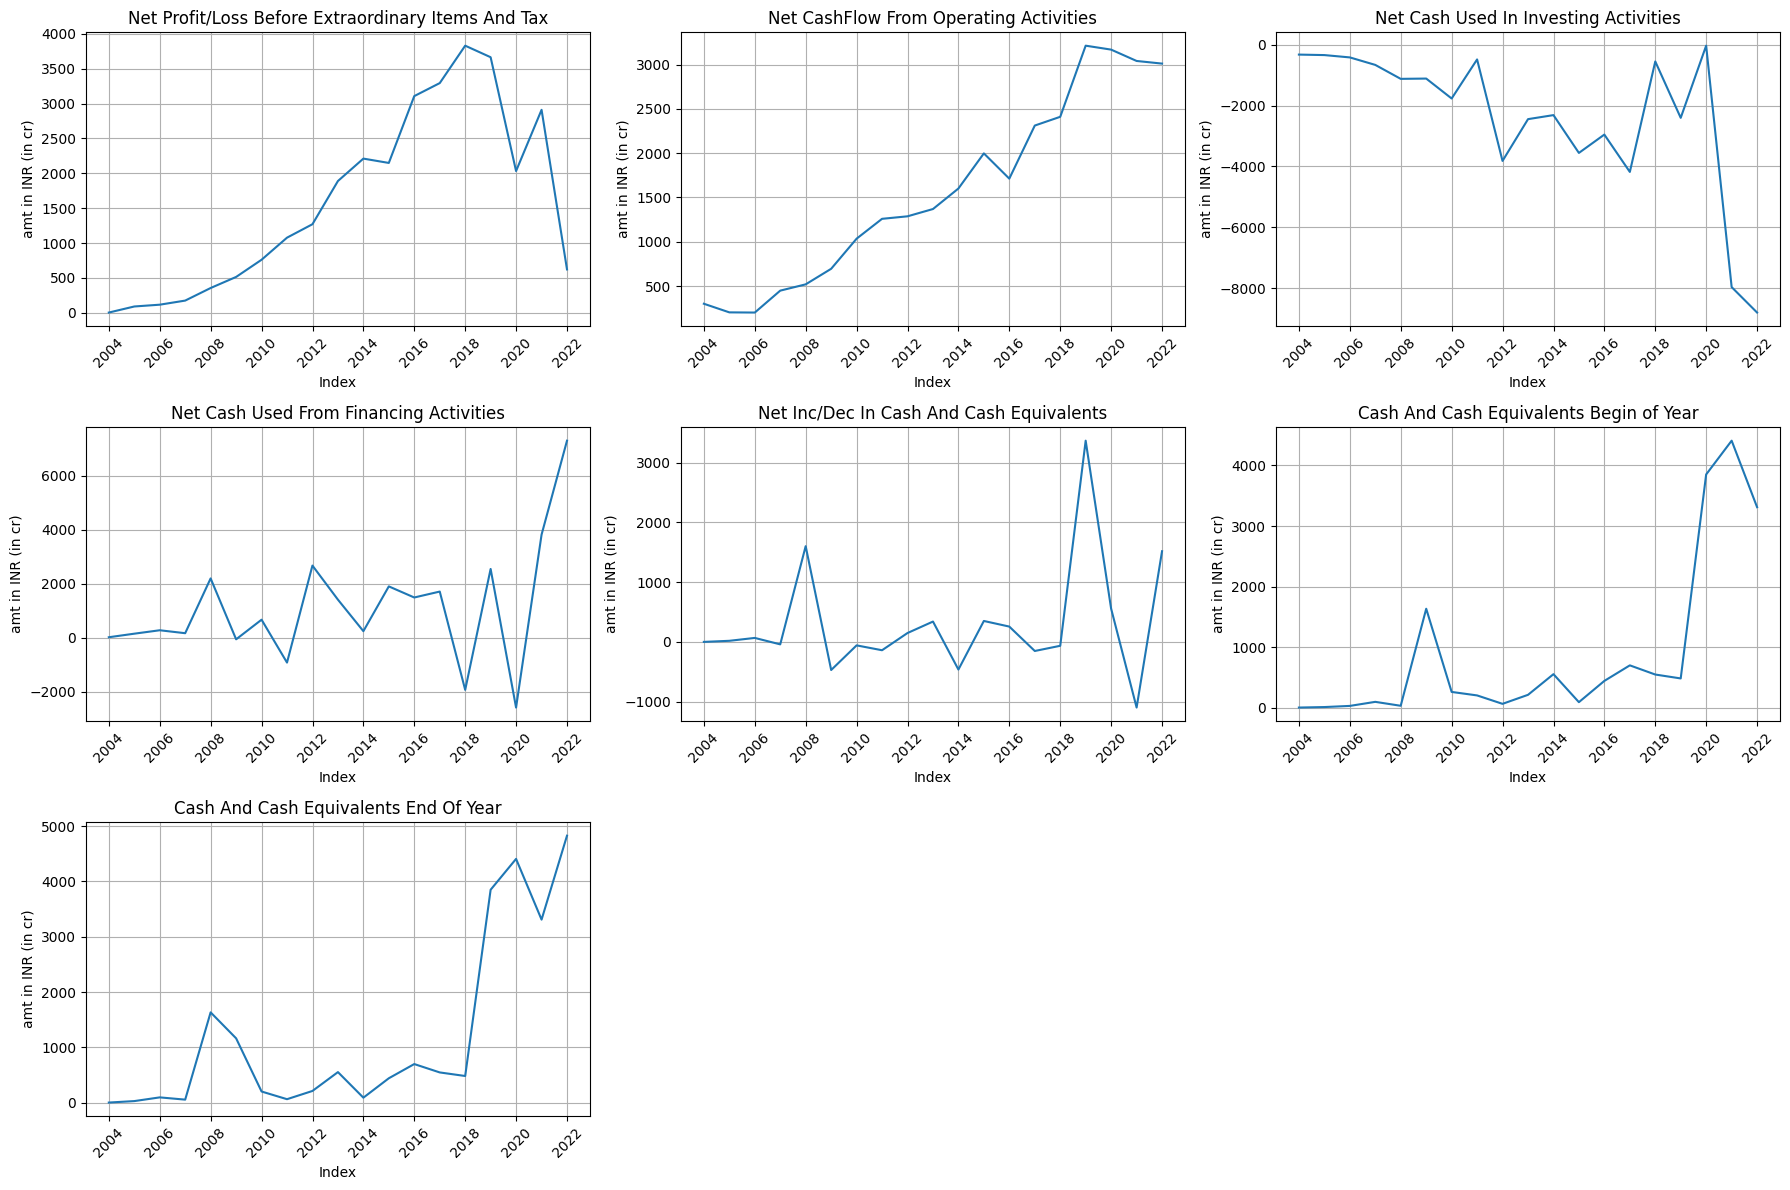

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_columns_in_grid(df):
    # Exclude the first column
    df = df.iloc[:, 1:]

    # Determine the number of columns and rows in the grid
    num_cols = 3  # Number of columns in the grid
    num_rows = (len(df.columns) - 1) // num_cols + 1  # Number of rows in the grid

    # Calculate the figure size based on the number of rows and columns
    figsize = (num_cols * 6, num_rows * 4)  # Adjust the multipliers to make the graphs bigger

    # Create a figure and axes for the grid
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Define the reversed date range from 2004 to 2022
    start_date = pd.Timestamp('2003-03-01')
    end_date = pd.Timestamp('2022-03-01')
    reversed_index = pd.date_range(start=start_date, end=end_date, freq='A').sort_values(ascending=False)

    # Plot each column in a separate graph
    for i, col in enumerate(df.columns):
        ax = axes[i]  # Select the current axis

        ax.plot(reversed_index, df[col])  # Use the reversed index for x-axis values
        ax.set_title(col)
        ax.set_xlabel('Index')
        ax.set_ylabel('amt in INR (in cr)')
        ax.grid(True)

        # Tilt the x-axis tick labels
        ax.tick_params(axis='x', labelrotation=45)

    # Remove any unused axes
    if len(df.columns) < len(axes):
        for j in range(len(df.columns), len(axes)):
            fig.delaxes(axes[j])

    # Adjust spacing between subplots
    fig.tight_layout()

    # Display the grid of graphs
    plt.show()


plot_columns_in_grid(df_cf)


In [10]:
df_1 = df_cf.set_index(['year'])
df_1
df_1 = df_1['Net Inc/Dec In Cash And Cash Equivalents']
df_1 = pd.DataFrame(df_1)
df_1.columns = ['Net Inc/Dec In Cash And Cash Equivalents']

c:\Users\rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1AS-MAR will be used.
  self._init_dates(dates, freq)
c:\Users\rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1AS-MAR will be used.
  self._init_dates(dates, freq)
c:\Users\rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, fr

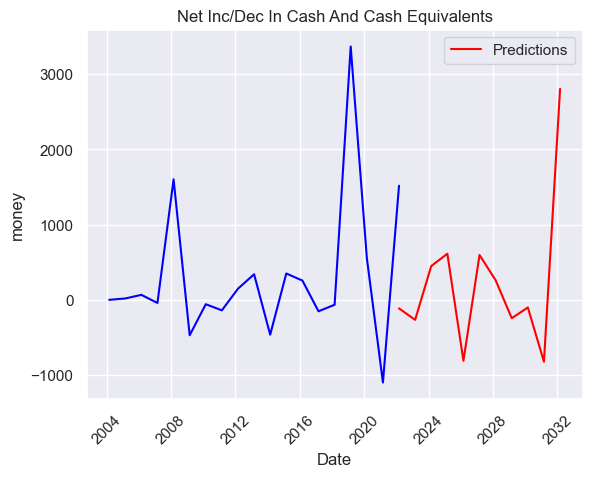

In [11]:
from datetime import datetime
from dateutil.rrule import rrule, YEARLY
from dateutil import tz
from statsmodels.tsa.statespace.sarimax import SARIMAX
import seaborn as sns
import matplotlib.pyplot as plt

df_1.index = pd.to_datetime(df_1.index)  # Convert the index to datetime if not already done

y = df_1['Net Inc/Dec In Cash And Cash Equivalents']
SARIMAXmodel = SARIMAX(y, order=(6, 0, 6), seasonal_order=(5,4,10,15))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(11)
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df["Predictions"] = SARIMAXmodel.predict(start=y_pred_df.index[0], end=y_pred_df.index[-1])

predicted_dates = pd.date_range(start='2022-02-01', periods=11, freq='AS-MAR')

y_pred_df.index = predicted_dates
y_pred_out = y_pred_df["Predictions"]

sns.set()
plt.title("Net Inc/Dec In Cash And Cash Equivalents")
plt.ylabel('money')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(df_1, color="blue")
plt.plot(y_pred_out, color='red', label='Predictions')
plt.legend()
plt.show()

In [12]:
corr_matrix = df_cf.iloc[:, 1:].corr()
corr_matrix = corr_matrix.replace(np.nan,0)
def sparsing(x):
    if x < -0.6:
        return -1
    elif x > 0.6:
        return 1
    else:
        return 0


for index, rows in corr_matrix.iterrows():
    for i in rows:
        corr_matrix.replace(i,sparsing(i),inplace=True)
        
corr_matrix = corr_matrix[~(corr_matrix == 0.0).all(axis=1)]
corr_matrix = corr_matrix.loc[:, (corr_matrix != 0).any(axis=0)]
#corr_matrix

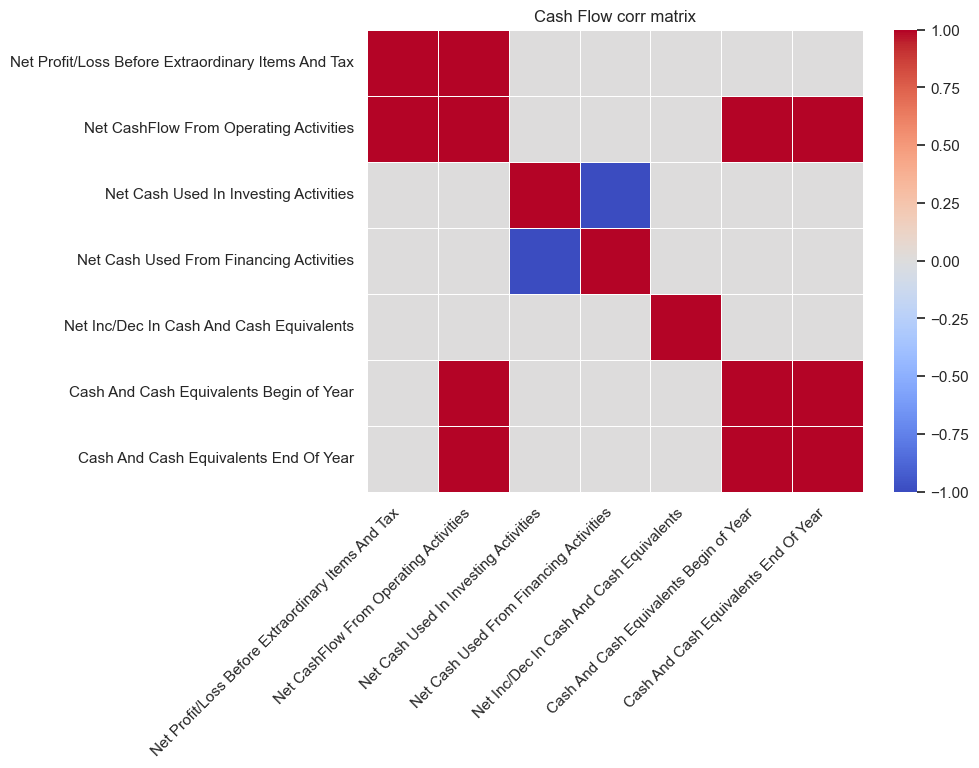

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Generate the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5, cbar=True)

# Add gaps between cells
ax.set_xticks(np.arange(0.5, len(corr_matrix.columns), 1))
ax.set_yticks(np.arange(0.5, len(corr_matrix.index), 1))
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='right')
ax.set_yticklabels(corr_matrix.index)

# Add grid lines between the cells
ax.grid(True, color='white')

# Add title and labels
ax.set_title('Cash Flow corr matrix')
ax.set_xlabel(None)
ax.set_ylabel(None)
# Show the plot
plt.show()

In [14]:
#corr_matrix.to_csv("..\data\cash_flow_corr.csv")

In [15]:
from datetime import datetime
from dateutil.rrule import rrule, YEARLY
from dateutil import tz
from statsmodels.tsa.statespace.sarimax import SARIMAX
import seaborn as sns
import matplotlib.pyplot as plt

df_1 = df_cf.set_index(['year'])
predictions_df = pd.DataFrame(index=df_1.index)
predictions_dict = {}

def sarimax_preds(df, column_name):
    df = pd.DataFrame(df)
    df.columns = [column_name]

    df.index = pd.to_datetime(df.index)  # Convert the index to datetime if not already done

    y = df[column_name]
    SARIMAXmodel = SARIMAX(y, order=(6, 0, 6), seasonal_order=(5, 4, 10, 15))
    SARIMAXmodel = SARIMAXmodel.fit()

    y_pred = SARIMAXmodel.get_forecast(11)
    y_pred_df = y_pred.conf_int(alpha=0.05)
    y_pred_df["Predictions"] = SARIMAXmodel.predict(start=y_pred_df.index[0], end=y_pred_df.index[-1])

    predicted_dates = pd.date_range(start='2023-03-01', periods=11, freq='AS-MAR')

    y_pred_df.index = predicted_dates
    y_pred_out = y_pred_df["Predictions"]

    predictions_df[column_name] = y_pred_out
    predictions_dict[column_name] = y_pred_out


for column_name in df_1.columns:
    sarimax_preds(df_1[column_name], column_name)


c:\Users\rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1AS-MAR will be used.
  self._init_dates(dates, freq)
c:\Users\rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1AS-MAR will be used.
  self._init_dates(dates, freq)
c:\Users\rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, fr

Combining predicted and present to a new df

In [16]:
predictions_dict

{'Net Profit/Loss Before Extraordinary Items And Tax': 2023-03-01    6701.067154
 2024-03-01    5762.646852
 2025-03-01    5435.974247
 2026-03-01    3759.298708
 2027-03-01    3867.938743
 2028-03-01    3306.083563
 2029-03-01    2221.783214
 2030-03-01    1884.540606
 2031-03-01    1330.787928
 2032-03-01     899.552789
 2033-03-01     621.530200
 Freq: AS-MAR, Name: Predictions, dtype: float64,
 'Net CashFlow From Operating Activities': 2023-03-01    4219.688856
 2024-03-01    4046.893801
 2025-03-01    2997.680964
 2026-03-01    3496.851124
 2027-03-01    2802.818401
 2028-03-01    2397.220771
 2029-03-01    2253.020724
 2030-03-01    2203.530708
 2031-03-01    1811.320582
 2032-03-01    1216.372891
 2033-03-01     908.512792
 Freq: AS-MAR, Name: Predictions, dtype: float64,
 'Net Cash Used In Investing Activities': 2023-03-01    -962.570309
 2024-03-01   -7316.892352
 2025-03-01   -5169.029161
 2026-03-01   -6223.842001
 2027-03-01   -4048.853801
 2028-03-01   -4280.256376
 2029-0

In [17]:
predictions_df = pd.DataFrame(predictions_dict)
predictions_df['year'] = pd.to_datetime(predictions_df.index).date
sarimax = pd.concat([df_cf, predictions_df], ignore_index=True)
sarimax['year'] = pd.to_datetime(sarimax['year']).dt.date
sarimax = sarimax.sort_values('year', ascending=False)
sarimax = sarimax.reset_index(drop=True)

In [18]:
#sarimax.to_csv("..\data\cash_flow_predicted.csv")

ploting a grid with predicted

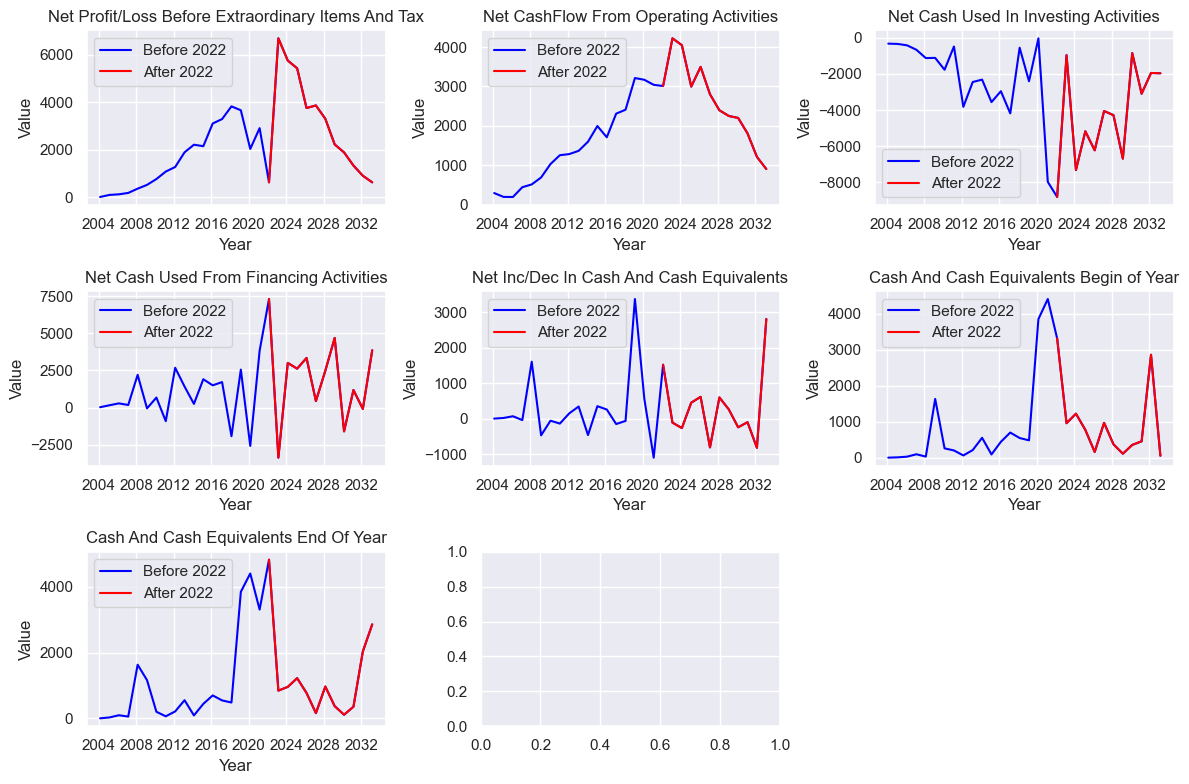

In [19]:
import matplotlib.pyplot as plt

def plot_columns_in_grid(df):
    # Convert the date column to datetime format
    df['year'] = pd.to_datetime(df['year']).dt.date

    # Determine the number of columns and rows in the grid
    num_cols = 3  # Number of columns in the grid
    num_rows = (len(df.columns) - 1) // num_cols + 1  # Number of rows in the grid

    # Create a figure and axes for the grid
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Plot each column in a separate graph
    for i, col in enumerate(df.columns[1:]):
        ax = axes[i]  # Select the current axis

        # Plot data points in blue before 2022
        ax.plot(df['year'], df[col], color='blue', label='Before 2022')

        # Plot data points in red after 2022
        ax.plot(df[df['year'] >= pd.to_datetime('2022').date()]['year'], df[df['year'] >= pd.to_datetime('2022').date()][col], color='red', label='After 2022')

        ax.set_title(col)
        ax.set_xlabel('Year')
        ax.set_ylabel('Value')
        ax.grid(True)
        ax.legend()

    # Remove any unused axes
    if len(df.columns) < len(axes):
        for j in range(len(df.columns), len(axes)):
            fig.delaxes(axes[j])

    # Adjust spacing between subplots
    fig.tight_layout()

    # Display the grid of graphs
    plt.show()


plot_columns_in_grid(sarimax)

Now use regression and predict better

In [20]:
# storing the correlated columns in a dictionary
correlation_dict = {}

# Iterate through each row
for row_label, row in corr_matrix.iterrows():
    non_zero_columns = row.index[row != 0].tolist()
    correlation_dict[row_label] = [col for col in non_zero_columns if col != row_label and pd.notnull(col)]

# Find and delete keys with empty list values
empty_list_keys = [key for key, value in correlation_dict.items() if isinstance(value, list) and not value]
for key in empty_list_keys:
    del correlation_dict[key]

correlation_dict

{'Net Profit/Loss Before Extraordinary Items And Tax': ['Net CashFlow From Operating Activities'],
 'Net CashFlow From Operating Activities': ['Net Profit/Loss Before Extraordinary Items And Tax',
  'Cash And Cash Equivalents Begin of Year',
  'Cash And Cash Equivalents End Of Year'],
 'Net Cash Used In Investing Activities': ['Net Cash Used From Financing Activities'],
 'Net Cash Used From Financing Activities': ['Net Cash Used In Investing Activities'],
 'Cash And Cash Equivalents Begin of Year': ['Net CashFlow From Operating Activities',
  'Cash And Cash Equivalents End Of Year'],
 'Cash And Cash Equivalents End Of Year': ['Net CashFlow From Operating Activities',
  'Cash And Cash Equivalents Begin of Year']}

In [21]:
# creates a dict to fill it with predicted values using correlated columns and using linear regresion
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Create a new dictionary to store the predicted values
prediction_dict = {}

# Iterate over the correlation dictionary
for key, values in correlation_dict.items():
    # Prepare the data for regression
    X_train = sarimax.loc[14:29, values].dropna()  # Independent variables for training (2004 to 2022)
    y_train = sarimax.loc[14:29, key].dropna()  # Dependent variable for training (2004 to 2022)

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict the dependent variable value
    X_predict = sarimax.loc[0:9, values]  # Independent variables for prediction (2023 to 2032)
    y_predict = model.predict(X_predict)  # Predicted dependent variable value

    # Create a pandas Series with predicted values and corresponding dates
    prediction_series = pd.Series(y_predict, index=pd.date_range(start='2023-03-01', end='2032-03-01', freq='AS-MAR'), name='Predictions')

    # Store the predicted values in the dictionary with corresponding dates
    prediction_dict[key] = prediction_series

prediction_dict

{'Net Profit/Loss Before Extraordinary Items And Tax': 2023-03-01     981.053635
 2024-03-01    1430.350418
 2025-03-01    2298.628198
 2026-03-01    2871.026987
 2027-03-01    2943.253641
 2028-03-01    3153.701884
 2029-03-01    3745.638647
 2030-03-01    4758.522975
 2031-03-01    4030.024713
 2032-03-01    5561.265538
 Freq: AS-MAR, Name: Predictions, dtype: float64,
 'Net CashFlow From Operating Activities': 2023-03-01    1161.428550
 2024-03-01     950.485674
 2025-03-01    1112.764940
 2026-03-01    1399.323621
 2027-03-01    1658.194590
 2028-03-01    2363.407388
 2029-03-01    2501.000561
 2030-03-01    2609.339753
 2031-03-01    3602.149942
 2032-03-01    3708.472718
 Freq: AS-MAR, Name: Predictions, dtype: float64,
 'Net Cash Used In Investing Activities': 2023-03-01   -4110.494294
 2024-03-01   -1107.456377
 2025-03-01   -2075.527137
 2026-03-01      39.650191
 2027-03-01   -4743.952387
 2028-03-01   -3062.452876
 2029-03-01   -1509.598344
 2030-03-01   -3717.187688
 2031-0

In [22]:
predictions_reg = pd.DataFrame(prediction_dict)
predictions_reg['year'] = pd.to_datetime(predictions_reg.index).date
regression = pd.concat([df_cf, predictions_reg], ignore_index=True)
regression['year'] = pd.to_datetime(regression['year']).dt.date
regression = regression.sort_values('year', ascending=False)
regression = regression.reset_index(drop=True)
regression.dropna(inplace=True, axis=1)

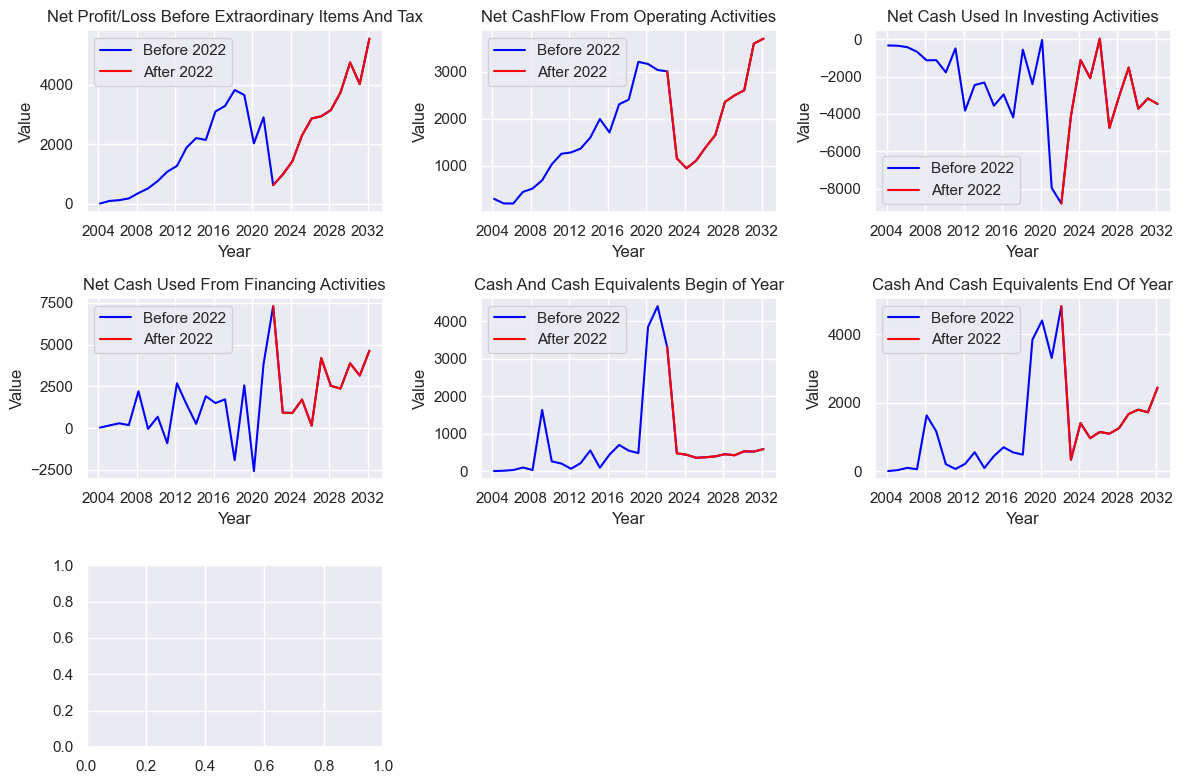

In [23]:
plot_columns_in_grid(regression)

lets use VAR multivariate

In [24]:
from statsmodels.tsa.vector_ar.var_model import VAR

df_1 = df_cf.set_index('year')

# Initialize dictionary to store predictions
var_dict = {}

def var_preds(df):
    # Prepare data for VAR modeling
    df.index = pd.to_datetime(df.index)  # Convert the index to datetime if not already done

    # Fit VAR model
    model = VAR(df)
    model_fit = model.fit()

    # Make predictions for the years 2023 to 2032
    forecast = model_fit.forecast(model_fit.endog, steps=10)
    forecast_df = pd.DataFrame(forecast, columns=df.columns)

    # Create a new DataFrame with predicted dates as the index
    predicted_dates = pd.date_range(start='2023-03-01', periods=10, freq='AS-JAN')
    forecast_df.index = predicted_dates

    # Store the predictions in the dictionary
    for column_name in df.columns:
        var_dict[column_name] = forecast_df[column_name]


# Perform VAR modeling using the entire DataFrame
var_preds(df_1)
var_dict

c:\Users\rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1AS-MAR will be used.
  self._init_dates(dates, freq)
c:\Users\rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


{'Net Profit/Loss Before Extraordinary Items And Tax': 2024-01-01    -27.449837
 2025-01-01   -175.821485
 2026-01-01   -319.254126
 2027-01-01   -355.371712
 2028-01-01   -390.615087
 2029-01-01   -408.939162
 2030-01-01   -422.327901
 2031-01-01   -438.384796
 2032-01-01   -453.421817
 2033-01-01   -468.204079
 Freq: AS-JAN, Name: Net Profit/Loss Before Extraordinary Items And Tax, dtype: float64,
 'Net CashFlow From Operating Activities': 2024-01-01    210.240541
 2025-01-01    138.080701
 2026-01-01    117.574140
 2027-01-01     95.145186
 2028-01-01     80.708191
 2029-01-01     68.519284
 2030-01-01     55.855421
 2031-01-01     44.244843
 2032-01-01     33.389439
 2033-01-01     23.640935
 Freq: AS-JAN, Name: Net CashFlow From Operating Activities, dtype: float64,
 'Net Cash Used In Investing Activities': 2024-01-01   -1008.738486
 2025-01-01    -876.798455
 2026-01-01    -811.448411
 2027-01-01    -786.441726
 2028-01-01    -730.463238
 2029-01-01    -705.358676
 2030-01-01    

In [25]:
df_VAR = pd.DataFrame(var_dict)
df_VAR['year'] = pd.to_datetime(df_VAR.index).date
multi_VAR = pd.concat([df_cf, df_VAR], ignore_index=True)
multi_VAR['year'] = pd.to_datetime(multi_VAR['year']).dt.date
multi_VAR = multi_VAR.sort_values('year', ascending=False)
multi_VAR = multi_VAR.reset_index(drop=True)
multi_VAR.dropna(inplace=True, axis=1)

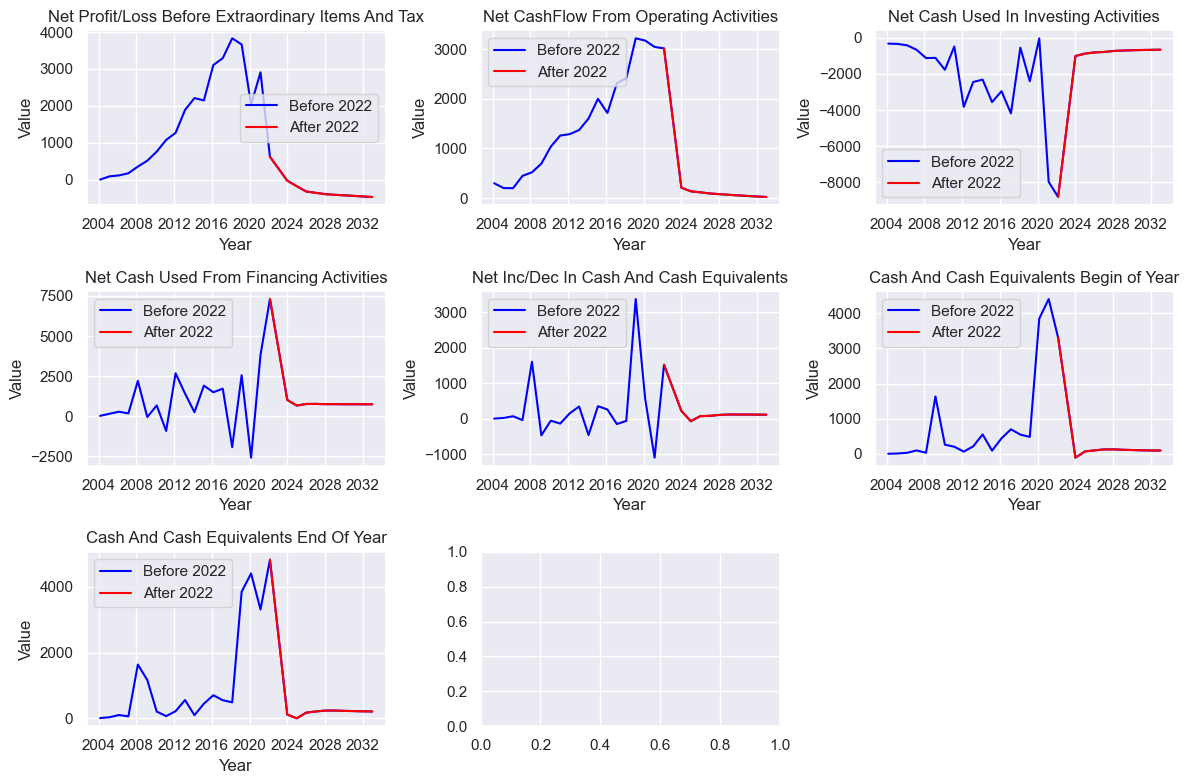

In [26]:
plot_columns_in_grid(multi_VAR)

errors

In [27]:
#df_cf.to_csv("..\data\df_cf_forpredictions.csv")